# Lec 1

In [1]:

import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
sns.set_theme('notebook', 'whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("data/buenos_aires1.csv", encoding = "cp1252")
data

,type,country,region,lat,lon,price_usd,area_m2,floor,rooms,expenses,property_url
0,apartment,Argentina,Capital Federal,-34.604783,-58.458681,180000.0,110.0,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.649700,-58.658073,410000.0,220.0,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
2,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.595709,-58.566950,180000.0,135.0,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
3,apartment,Argentina,Capital Federal,-34.584651,-58.454693,129000.0,70.0,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
4,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.655209,-58.697320,130000.0,140.0,NaN,NaN,NaN,http://ituzaingo-bs-as-g-b-a-zona-oeste.proper...
...,...,...,...,...,...,...,...,...,...,...,...
4827,apartment,Argentina,Bs.As. G.B.A. Zona Oeste,-34.601062,-58.566101,54000.0,31.0,10.0,2.0,NaN,http://caseros.properati.com.ar/vbya_venta_dep...
4828,apartment,Argentina,Bs.As. G.B.A. Zona Norte,-34.492839,-58.495680,85000.0,27.0,6.0,NaN,NaN,http://martinez.properati.com.ar/11cqc_venta_d...
4829,house,Argentina,Bs.As. G.B.A. Zona Norte,-34.356741,-58.796701,1600000.0,600.0,NaN,NaN,NaN,http://bs-as-g-b-a-zona-norte.properati.com.ar...
4830,house,Argentina,Capital Federal,-34.612354,-58.387462,190000.0,115.0,NaN,NaN,NaN,http://san-nicolas.properati.com.ar/zzpa_venta...


## EDA & Wrangling

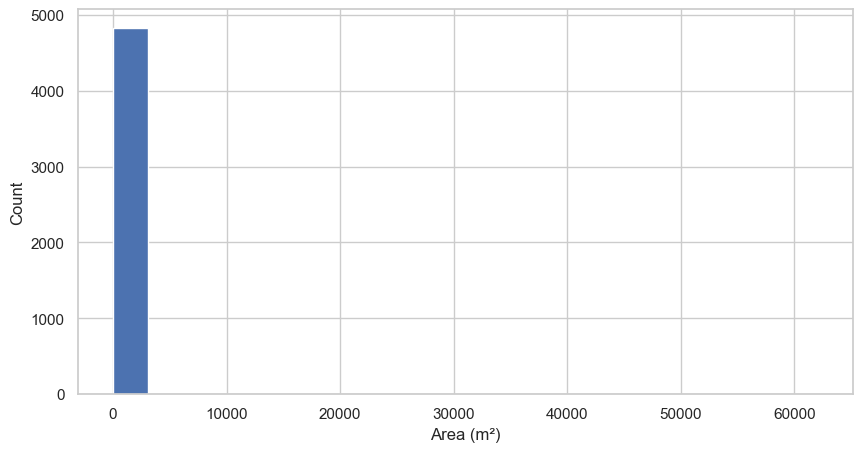

In [3]:
data.area_m2.plot(kind="hist",
                  xlabel="Area (m²)", 
                  ylabel="Count", 
                  bins=20, 
                  figsize=(10, 5));

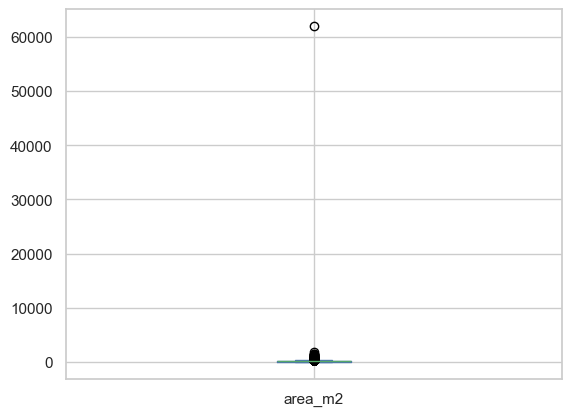

In [4]:
data.area_m2.plot(kind="box");

In [5]:
lo,high =data.area_m2.quantile([0.1,0.9])
data = data[data.area_m2.between(lo,high)]

high = data.price_usd.quantile(0.97)
data = data [data.price_usd.between(0,high)]


data = data[['type', 'country', 'region', 'lat', 'lon', 'area_m2', 'price_usd']]
df = data.reset_index(drop=True)
df.region = df.region.str.replace('Bs.As. G.B.A. ','')

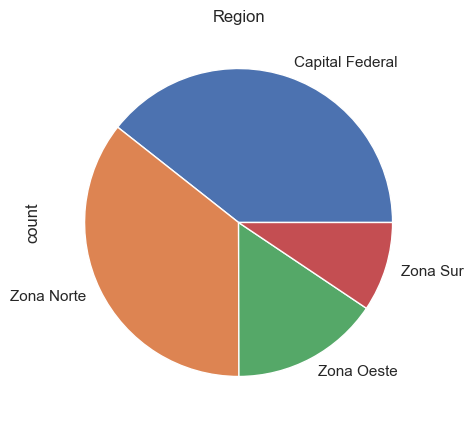

In [6]:
df.region.value_counts().plot(kind="pie",  
               title="Region",
               figsize=(10, 5));

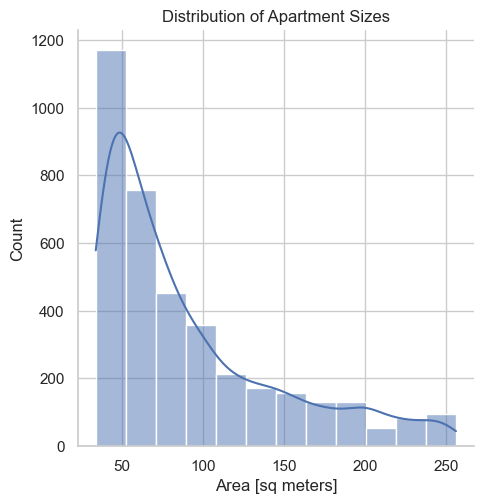

In [7]:
sns.displot(data = df,
           x = 'area_m2',
           kde = True,
           bins = 12)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

<Axes: >

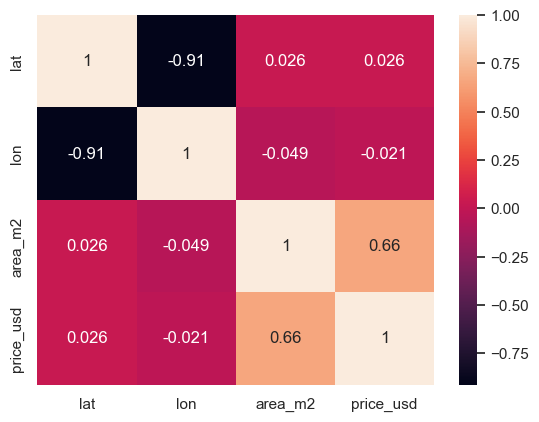

In [8]:
sns.heatmap(df.iloc[:,3:].corr(), annot=True)

## Sampling: Stratified

In [9]:
# Stratified sampling
df.groupby('region').sample(frac=1)

,type,country,region,lat,lon,area_m2,price_usd
3552,apartment,Argentina,Capital Federal,-34.596079,-58.439872,64.0,130000.00
590,apartment,Argentina,Capital Federal,-34.626260,-58.446004,117.0,390000.00
2666,apartment,Argentina,Capital Federal,-34.581491,-58.448392,56.0,210000.00
2121,apartment,Argentina,Capital Federal,-34.553811,-58.453759,43.0,135500.00
2262,apartment,Argentina,Capital Federal,-34.607026,-58.442438,42.0,137000.00
...,...,...,...,...,...,...,...
1750,apartment,Argentina,Zona Sur,-34.931964,-57.946572,48.0,89000.00
3520,apartment,Argentina,Zona Sur,-34.724595,-58.263674,34.0,66500.00
1979,house,Argentina,Zona Sur,-34.714894,-58.263928,95.0,210000.00
2310,house,Argentina,Zona Sur,-34.665881,-58.379939,115.0,160000.00


In [10]:
# Calculate the number of datapoints to be sampled in each strata
n = df['region'].value_counts().min()

# Sample each strata
sample = df.groupby('region', 
                        group_keys=False).apply(lambda 
                                                x: x.sample(n))

sample = sample.reset_index(drop=True)
sample.index += 1

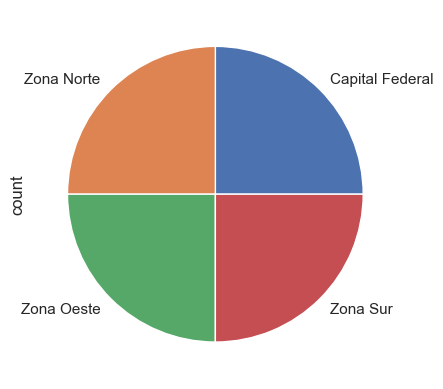

In [11]:
sample.region.value_counts().plot(kind="pie");

In [12]:
sample

,type,country,region,lat,lon,area_m2,price_usd
1,apartment,Argentina,Capital Federal,-34.568871,-58.488422,38.0,94635.0
2,apartment,Argentina,Capital Federal,-34.634441,-58.474747,61.0,122000.0
3,apartment,Argentina,Capital Federal,-34.565031,-58.464179,75.0,180000.0
4,apartment,Argentina,Capital Federal,-34.644224,-58.457394,38.0,84280.0
5,apartment,Argentina,Capital Federal,-34.617772,-58.406557,35.0,66458.0
...,...,...,...,...,...,...,...
1416,apartment,Argentina,Zona Sur,-34.660430,-58.363005,58.0,114000.0
1417,house,Argentina,Zona Sur,-34.799003,-58.399293,159.0,230000.0
1418,house,Argentina,Zona Sur,-34.731413,-58.406984,160.0,195000.0
1419,house,Argentina,Zona Sur,-34.904521,-58.357402,130.0,140000.0


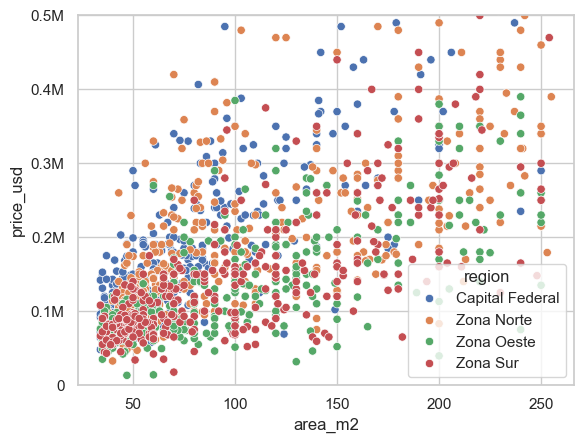

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax);
ax.set_ylim(0,500000);
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);

plt.yticks([0,100000,200000,300000,400000,500000]);

## Modelling

### Train - Test Split

In [14]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(sample['area_m2'],
                                             sample['price_usd'],
                                             test_size=0.2,
                                             random_state=69)

In [15]:
xTrain = pd.DataFrame(xTrain).rename({0:'area_m2'},axis=1)
xTest = pd.DataFrame(xTest).rename({0:'area_m2'},axis=1)

### Baseline

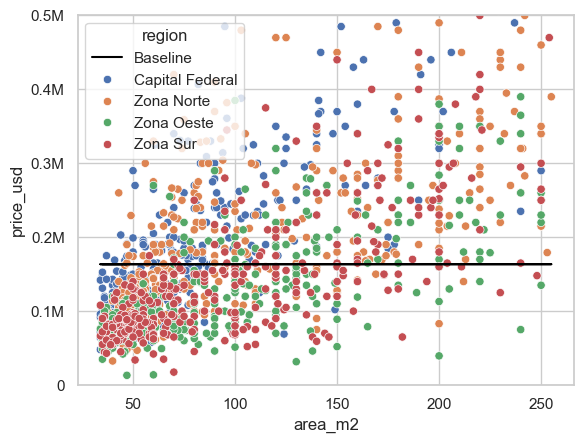

In [16]:
modelBs = np.full_like(yTrain, np.mean(yTrain))


fig, ax = plt.subplots()
plt.plot(xTrain.squeeze(),modelBs,color='black',label='Baseline')
sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax)
ax.set_ylim(0,500000)
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);

In [17]:
error = mean_absolute_error(yTrain,modelBs)
error2 = mean_absolute_error(yTest,np.full_like(yTest, np.mean(yTrain)))
f'error for training - {round(error,2)} || error for test data - {round(error2,2)}'

'error for training - 76566.05 || error for test data - 68181.26'

### Iteration & Final LR Model

In [18]:
# Initialize the model
model = LinearRegression()

In [19]:
model.fit(xTrain,yTrain)

LinearRegression()

In [20]:
LRerror = mean_absolute_error(yTrain,model.predict(xTrain))
LRerror2 = mean_absolute_error(yTest,model.predict(xTest))
f'error for training - {round(LRerror,2)} || error for test data - {round(LRerror2,2)}'

'error for training - 53787.93 || error for test data - 47299.51'

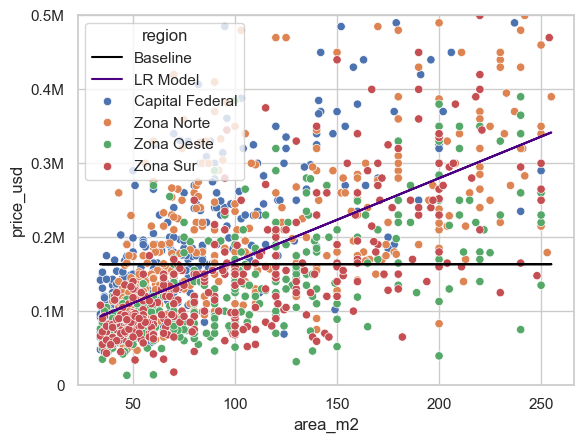

In [21]:
# Visualising the model
fig, ax = plt.subplots()
plt.plot(xTrain.squeeze(),modelBs,color='black',label='Baseline')
plt.plot(xTrain.squeeze(),model.predict(xTrain),color='indigo',label='LR Model')
sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax)
ax.set_ylim(0,500000)
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);

# Lec 2

In [22]:
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

## Summing Up Lesson 1

In [23]:

def wrangleNsample(filepath):
    data = pd.read_csv(filepath)
    
    lo,high =data.area_m2.quantile([0.1,0.9])
    data = data[data.area_m2.between(lo,high)]
    high = data.price_usd.quantile(0.97)
    data = data [data.price_usd.between(0,high)]


    data = data[['region', 'lat', 'lon', 'area_m2', 'price_usd']]
    df = data.reset_index(drop=True)
    df.region = df.region.str.replace('Bs.As. G.B.A. ','')

    # Calculate the number of datapoints to be sampled in each strata
    n = df['region'].value_counts().min()

    # Sample each strata
    sample = df.groupby('region', 
                            group_keys=False).apply(lambda 
                                                    x: x.sample(n))

    sample = sample.reset_index(drop=True)
    sample.index += 1
    
    return sample

In [24]:
sample2 = wrangleNsample("data/buenos_aires2.csv")
sample2

,region,lat,lon,area_m2,price_usd
1,Capital Federal,-34.577168,-58.538654,175.0,345000.0
2,Capital Federal,-34.566256,-58.482418,35.0,115000.0
3,Capital Federal,-34.599128,-58.444994,46.0,125000.0
4,Capital Federal,-34.603170,-58.392108,155.0,310000.0
5,Capital Federal,-34.564291,-58.456208,76.0,168000.0
...,...,...,...,...,...
1588,Zona Sur,-34.683493,-58.343825,59.0,120000.0
1589,Zona Sur,-34.916710,-57.936959,36.0,70000.0
1590,Zona Sur,-34.932298,-57.976699,210.0,310000.0
1591,Zona Sur,-34.824606,-58.400037,246.0,230000.0


## Dataset for the Lesson

In [25]:
df2 = pd.concat([sample,sample2],ignore_index=True)
df2

,type,country,region,lat,lon,area_m2,price_usd
0,apartment,Argentina,Capital Federal,-34.568871,-58.488422,38.0,94635.0
1,apartment,Argentina,Capital Federal,-34.634441,-58.474747,61.0,122000.0
2,apartment,Argentina,Capital Federal,-34.565031,-58.464179,75.0,180000.0
3,apartment,Argentina,Capital Federal,-34.644224,-58.457394,38.0,84280.0
4,apartment,Argentina,Capital Federal,-34.617772,-58.406557,35.0,66458.0
...,...,...,...,...,...,...,...
3007,NaN,NaN,Zona Sur,-34.683493,-58.343825,59.0,120000.0
3008,NaN,NaN,Zona Sur,-34.916710,-57.936959,36.0,70000.0
3009,NaN,NaN,Zona Sur,-34.932298,-57.976699,210.0,310000.0
3010,NaN,NaN,Zona Sur,-34.824606,-58.400037,246.0,230000.0


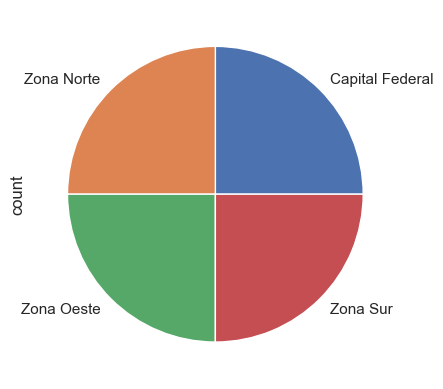

In [26]:
df2.region.value_counts().plot(kind="pie");

In [27]:
# Visualisation
fig = px.scatter_mapbox(
    df2,  # Our DataFrame
    lat='lat',
    lon='lon',
    width=600,  # Width of map
    height=600,  # Height of map
    color='price_usd',
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

## Modelling through Pipeline

In [28]:
features = ["lon", "lat"]
X_train = df2[features]

target = "price_usd"
y_train = df2[target]

y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 163467.14
Baseline MAE: 74935.05


In [29]:
imputer = SimpleImputer()
imputer.fit(X_train)
XT_train = imputer.transform(X_train)
pd.DataFrame(XT_train, columns=X_train.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     3012 non-null   float64
 1   lat     3012 non-null   float64
dtypes: float64(2)
memory usage: 47.2 KB


In [30]:
model2 = make_pipeline(
    SimpleImputer(),
    LinearRegression())
    

In [31]:
model2.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [32]:
y_pred_training = model2.predict(X_train)
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 74912.07


In [33]:
intercept = model2.named_steps['linearregression'].intercept_.round(2)
coefficients = model2.named_steps['linearregression'].coef_.round(2)
print(
    
    f"price = {intercept} + ({coefficients[0]} * longitude) + ({coefficients[1]} * latitude)"
)

price = 48008.0 + (-1747.81 * longitude) + (-380.23 * latitude)


# Lec 3

In [34]:
from glob import glob

from category_encoders import OneHotEncoder
from sklearn.linear_model import Ridge


In [35]:
files = glob("data/*.csv")
files = [files[0]]
files

['data\\argentinahousing.csv']

In [36]:
def wrangleNsample2(filepath):
    data = pd.read_csv(filepath)
    
    lo,high =data.area_m2.quantile([0.1,0.9])
    data = data[data.area_m2.between(lo,high)]
    high = data.price_usd.quantile(0.97)
    data = data [data.price_usd.between(0,high)]


    data = data[['region', 'locality','lat', 'lon', 'area_m2', 'price_usd']]
    df = data.reset_index(drop=True)
    df.region = df.region.str.replace('Bs.As. G.B.A. ','')

    # Calculate the number of datapoints to be sampled in each strata
    n = df['region'].value_counts().min()

    # Sample each strata
    sample = df.groupby('region', 
                            group_keys=False).apply(lambda 
                                                    x: x.sample(n))

    sample = sample.reset_index(drop=True)
    sample.index += 1
    
    return sample

In [37]:
load = lambda files: [wrangleNsample2(i) for i in files]
frames = load(files)
df3 = pd.concat(frames,ignore_index=True)
df3 = df3.dropna()
df3

,region,locality,lat,lon,area_m2,price_usd
0,Capital Federal,Almagro,-34.604682,-58.419628,76.0,184900.0
1,Capital Federal,Villa Crespo,-34.597769,-58.426440,64.0,186800.0
2,Capital Federal,Balvanera,-34.609502,-58.411796,38.0,72000.0
3,Capital Federal,Palermo,-34.597866,-58.415931,45.0,150000.0
4,Capital Federal,Almagro,-34.617470,-58.418382,50.0,89500.0
...,...,...,...,...,...,...
5219,Capital Federal,Nuñez,-34.549608,-58.474142,35.0,131000.0
5220,Capital Federal,Almagro,-34.600614,-58.417677,36.0,61000.0
5221,Capital Federal,Villa Urquiza,-34.577264,-58.489325,36.0,80000.0
5222,Capital Federal,Palermo,-34.593878,-58.429594,40.0,143000.0


In [38]:
# Baseline
features = ['area_m2','locality']
X_train3 = df3[features]

target = "price_usd"
y_train3 = df3[target]

y_pred_baseline3 = [y_train3.mean()] * len(y_train3)

mae_baseline3 = mean_absolute_error(y_train3,y_pred_baseline3)

print("Mean apt price", round(y_train3.mean(), 2))
print("Baseline MAE:", round(mae_baseline3, 2))

Mean apt price 123198.26
Baseline MAE: 33791.96


In [39]:
# Model3
model3 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)
model3

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [40]:
model3.fit(X_train3,y_train3)
mae_model3 = mean_absolute_error(y_train3,model3.predict(X_train3))
print("Model MAE:", round(mae_model3, 2))

Model MAE: 20666.2


## Visualising the Model

In [41]:

intercept3 = model3.named_steps['ridge'].intercept_.round(2)
coefficients3 = model3.named_steps['ridge'].coef_.round(2)

localities = pd.Series(model3.named_steps['onehotencoder'].get_feature_names()).str.replace('locality_','')

locNcoefs = pd.DataFrame({'locality':localities, 'coefficient':coefficients3}).set_index('locality')


In [42]:
locNcoefs.head()

,coefficient
locality,
area_m2,1996.45
Almagro,107.99
Villa Crespo,8974.50
Balvanera,-17028.41
Palermo,34926.79


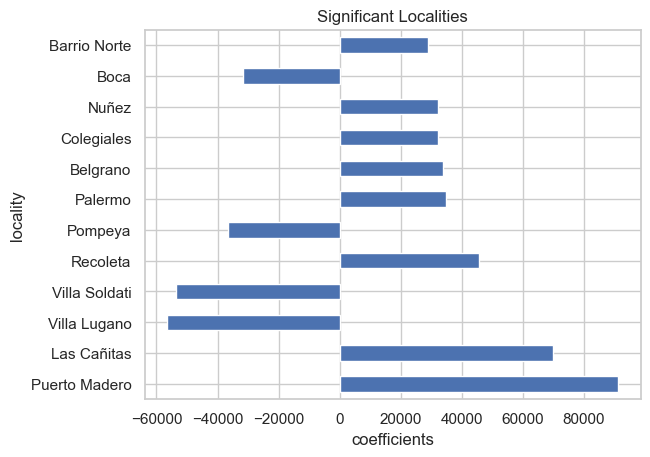

In [43]:
impLoc= locNcoefs.sort_values(by='coefficient',key= abs,ascending=False).head(12)

impLoc.plot(kind='barh',
            xlabel= 'coefficients' ,
            title='Significant Localities',
            legend=False);

# Lec 4

## Deploying the model

In [44]:
def predict(area, locality):
    data = {
        'area_m2': area,
        'locality': locality,
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model3.predict(df)[0].round(2)
    
    print(f'Predicted price: ${ prediction}')

In [45]:
predict(60,'Villa del Parque')

Predicted price: $126934.84


In [46]:
import ipywidgets as widgets

widgets.interact(
    predict,
    area=widgets.IntSlider(
        min=X_train3["area_m2"].min(),
        max=X_train3["area_m2"].max(),
        value=X_train3["area_m2"].mean(),
    ),
    locality=widgets.Dropdown(options=sorted(X_train3["locality"].unique())),
);

interactive(children=(IntSlider(value=51, description='area', max=82, min=34), Dropdown(description='locality'…